## ## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#Gathering_Data)
> - [*csv file](#csv)
> - [*tsv file](#tsv)
> - [*Twitter API](#tweet_api)
- [Part II - Assess Data](#Assesing_Data)
- [Part III - Clean Data](#Clean_Data)
- [Part IV - Storing Data](#Store_Data)
- [Part V - Analysis](#Analysis_Data)


<a id='intro'></a>
### Introduction

The project aimed to analyze the data in <a href = 'https://twitter.com/dog_rates'>"WeRateDogs"</a> channel on Twitter.com.<br>

#### Gathering Data
First, we gather data from different sources:
- **\*.csv file, stored in the local machine.** This file contains preliminarily gathered data of tweets specified by a tweeet_id parameter. The file should be assessed, cleaned and structured in a desired manner.
- **\*tsv file stored in the remote server.** This file contains the data about breed prediction based on pictures gathered from tweets in the channel. Each tweet specified by the tweet_id parameter. The file needs to be assessed, cleaned and structured in the desired way.
- **Twitter API** - an archive of all tweets in the channel. We need to get additional information from the Twitter server. Since we have the tweet_id parameter in both files mentioned above, we going to extract particular data, associated with each tweet_id from the server.<br><br>

#### Assess and Clean Data

We have three different sources of data and we need to get one solid data set with good quality and tidy data. Perform assessing data from each source and fix every issue we found to get data ready for analysis.


#### Storing Data

After "assess and clean" stage we suppose to have a few different data frames with data associated with tweet_id. Plan to merge all data frames into one. Restructure final df if it needs and stores to the csv file.


#### Analysis

We want to get answers to the following questions:

- What are the top three breeds holding most retweets?
- What are the top three breeds holding favorites?
- Are the breeds mentioned above are the same that holding most audience engagement (the sum of retweets and favorites)
- How often is the top breed holding most engagement (in the following mention just 'top breed') mentioned in tweets?
- What is the set of words for tweets with the top breed?
- How often the words from the top-breed-set appeared in tweets?
- Are there some words, that more specific for the top breed?
- We have a huuuge amount of other questions and gonna find their answers in other projects))



<a id='Gathering_Data'></a>
# Part I - Gathering Data

To get started, let's import libraries.

In [406]:
import pandas as pd
import numpy as np
import requests
import re
import os
import matplotlib.pyplot as plt


<br>
<a id='csv'></a>

###  Gathering data from *.csv file

In [2]:
#read the cav file and store into pandas data frame
df_master = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#visual assessmnet is good with no ".head(1)"
df_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<br>
<a id='tsv'></a>

###  Gathering data from *.tsv file

In [4]:
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#create an object with data we got from url request
#r = requests.get(url)


In [5]:
# create file in home directory and write the content of object into it
#with open('predict.tsv', 'w') as f:
#    f.write(r.content)

In [6]:
#read file and import data into the pandas df
predict = pd.read_csv('predict.tsv', sep = '\t')

In [7]:
predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


<br>
<a id='tweet_api'></a>

###  Gathering data from Tweitter API
The idea of this part is to get retweet count and favorite count for each tweet_id we have in 'df_master' data frame to associate that counts with a particular breed later
To get started, let's import libraries

In [8]:
import tweepy
import json

In [9]:
# get a list of tweets id
id_list = df_master['tweet_id'].tolist();
# get the length of id list
len(id_list)

2356

In [10]:
#check
id_list[0:3]

[892420643555336193, 892177421306343426, 891815181378084864]

In [11]:
#create connections and API object for further use 
from key import key
consumer_key = key['consumer_key']
consumer_secret = key['consumer_secret']
access_token = key['access_token']
access_secret = key['access_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#pass auth and set the True values for the time-limit parameters of API-class object
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

import time

#Get API objects for each id, check if such id doesn't exist, write json data into the file

count = 0 #counter of itterations
the_begining = time.time() # set the timer on start
no_id_list = {} #dict for storing not existing ids

with open ('tweet_json.txt', 'w+') as file: #create and open a file
    for id in id_list: #loop through the list of ids
        
        try: #attempts to do thing with a possibility to catch errors
            
            #count +=1
            #print(str(count),'-', id)   
            tweet = api.get_status(id, tweet_mode='extended', include_entities = True); #create API object for specified id
            #print('Hurrrraaaay!') 
            
            json.dump(tweet._json, file)#write the json data from API object to the file
            file.write('\n')# take a new line for the next entry 
            
        except tweepy.TweepError as e:
                #print('Fail')
                no_id_list[id] = e #assign the error value to the failed id, store it in dict
                pass
            
the_end = time.time() #set the timer on finish
print('Session duration is', ' ', the_end - the_begining)
print('Fails dump', '\n', no_id_list)


Let's read our 'text_json' file. <br>
Get just three elements we need: 'Tweet id', 'Expanded URL', 'Retweet Count' and 'Favorite Count' for each id. Store these data into the new data frame


In [12]:
#create new data frame with desired columns names
counts_df = pd.DataFrame(columns = ['tweet_id', 'entities', 'retweet_count', 'favor_count'])

with open ('tweet_json.txt') as file: #open file
#read file line by line, extract data, store it in dataframe object and append it to counts_df data frame
    for line in file:
        status = json.loads(line) #get a json object out of each line in a file
        tweet_id = status['id_str'] #get id element
        retweet_count = status['retweet_count']# get retweets count
        favor_count = status['favorite_count']#get favorites count
        entities = status['entities']
        counts_df = counts_df.append(pd.DataFrame([[tweet_id, entities, retweet_count, favor_count]], \
                                                 columns = ['tweet_id', 'entities', 'retweet_count', 'favor_count']))
counts_df = counts_df.reset_index(drop = True)

In [13]:
counts_df.head(2)

,tweet_id,entities,retweet_count,favor_count
0,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...",8238,37795
1,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...",6088,32470


In [14]:
def extract_url(dict):
    if 'media' in dict:
        return dict['media'][0]['expanded_url']
    else:
        return None

In [15]:
# get expanded_url variable values
counts_df['expanded_url'] = [extract_url(entities) for entities in counts_df['entities']]

In [16]:
counts_df.head(2)

,tweet_id,entities,retweet_count,favor_count,expanded_url
0,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...",8238,37795,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...",6088,32470,https://twitter.com/dog_rates/status/892177421...


In [17]:
#drop 'entities' column
counts_df.drop('entities', axis = 1, inplace = True)

In [18]:
counts_df.shape[0]

2284

In [19]:
counts_df['expanded_url'].isnull().sum()

232

In [20]:
counts_df[counts_df['expanded_url'].isnull() == True].sample(5)

,tweet_id,retweet_count,favor_count,expanded_url
679,781655249211752448,1214,4240,None
1299,702899151802126337,479,1675,None
1751,676590572941893632,132,939,None
1033,736392552031657984,7838,18447,None
362,824025158776213504,634,5024,None


In [21]:
counts_df[counts_df['expanded_url'].str.contains('dog_rates') == False].shape[0]

0

In [22]:
counts_df.to_csv('counts_df.csv', index = False)

<br><br>**No we have three different data frames:**
- "df_master" - the data frame with a bunch of data associated with tweet_id. Gathered from *.csv file
- "predict" - the data frame with dog breed prediction data associated with the picture, captured from the tweet with specified twee_id. Gathered from *.tsv file
- "counts_df" - the data frame with data about retweet_counts and favorite_count associated with particular tweet_id. Gathered from through Twitter API
<br><br>
Let's assess each data frame for the quality and tidy issues

<br>
<a id='Assesing_Data'></a>

# Part II - Assess Data
  
    

In [23]:
# copy data frame
df = df_master.copy()

In [24]:
# visual assessmnet is ok with no ".head(1)"
# additional vs is ok in Excel
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [25]:
df.shape

(2356, 17)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [28]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
df.text[9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

In [30]:
df.text[19]

'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [31]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
pr = predict.copy()

In [33]:
pr.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [34]:
pr.shape

(2075, 12)

In [35]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
pr.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [37]:
count = counts_df.copy()

In [38]:
count.head()

,tweet_id,retweet_count,favor_count,expanded_url
0,892420643555336193,8238,37795,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,6088,32470,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,4029,24443,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,8395,41123,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,9091,39333,https://twitter.com/dog_rates/status/891327558...


In [39]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 4 columns):
tweet_id         2284 non-null object
retweet_count    2284 non-null object
favor_count      2284 non-null object
expanded_url     2052 non-null object
dtypes: object(4)
memory usage: 71.5+ KB


In [40]:
count.nunique()

tweet_id         2284
retweet_count    1689
favor_count      1977
expanded_url     1991
dtype: int64

# <br>

## Assessing Report

<br>

### Quality
**df**
- Columns 'in_reply_to_status_id' and 'in_reply_to_user_id' has very little amount of data and make no sense for further analysis. Drop'm
- Data in every cell in column 'timestamp' has '+0000' at the end of the string. 
- Column 'timestamp' in 'object' data type. Convert to 'datetime'
- Column 'source' has wrong data totally. Drop it
- Some cells in the column 'text' contains '@' sign with some diffirent chanales names, that associated with retweets. Need to get closer look and figure it out.
- Columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are lack of data. Drop'm
- Some cells in column 'expanded_urls' has two or more urls and some of urls doesn't belong to WeRateDogs chanel.
- Duplicated and missing data in column 'expanded_urls' 
- Column 'rating_numerator' has several outliers, so need to get closer what are they exactly.
- Column 'rating_denominator' - need to figure out the outliers.
- Column 'name' has some wrong data such as 'None' and other words that not suppose to be the names of dogs. Need to figure out how to handle them.
- Columns 'doggo', 'floffer', 'pupper', 'puppo' need to be merged in one column since they holds different values of one variable.


**predict**
- Some names are lowercased. Capitalize'm
- Some rows contains predictions that not mathes with dog breed names. Drop'm


**counts_df**
- Columns 'tweet_id', 'retweet_count', 'favor_count' dtypes is 'object'. Need 'int'

 
<br>

### Tidiness

**df**
- Column 'text' has two types of data, associated with different variables: 1) The text of the tweet, 2) The link to the tweet. The link to the tweet is the same link that stored in the column named ' expanded_urls'. So, the data in column 'text' need to be separated and we need to keep just part 1 - actually the text of the tweet.

**predict**
- All predictions are different level of confident of prediction the value of one variable. We need to form one column with predicted dog  breed name associated with particular tweet_id in descendent priority order: p1>p2>p3

<br>
<a id='Clean_Data'></a>

# Part III - Clean Data
  
    

## Quality

# <br>

### 'df' data frame

In [41]:
df = df_master.copy()

<br>

#### Define

Columns 'in_reply_to_status_id' and 'in_reply_to_user_id' has very little amount of data and make no sense for further analysis. Drop'm

#### Code

Before dropping the columns, lest substract the rows with data in 'in_reply_to_status_id' and see what is in it

In [42]:
#overview with no '.head()'
df[(df['in_reply_to_status_id'].isnull() == False)].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


Some rows here are without simbol "@", so we consider tham as original posts. Let's drop other rows

In [43]:
#get list of indexes of rows to drop
list = df[(df['in_reply_to_status_id'].isnull() == False) & (df['text'].str.contains('@'))].index.tolist();

In [44]:
#drop the rows 
df.drop(list, axis = 0, inplace = True)

In [45]:
# now drop the columns
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

In [46]:
#reset index
df = df.reset_index(drop = True);

#### Test

In [47]:
df.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<br>

#### Define

Data in every cell in column 'timestamp' has '+0000' at the end of the string.

#### Code

In [48]:
#get the instance and the lentgh of string in cell
df.loc[0,'timestamp'], len(df.loc[0,'timestamp'])

('2017-08-01 16:23:56 +0000', 25)

In [49]:
#cut last six elements from the string in each cell in column(space included)
df['timestamp'] = df['timestamp'].str[:19]

#### Test

In [50]:
#check
df.loc[0,'timestamp'], len(df.loc[0,'timestamp'])

('2017-08-01 16:23:56', 19)

<br>

#### Define

Column 'timestamp' in 'object' data type. Convert to 'datetime'

#### Code

In [51]:
#convert data type 
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [52]:
df.timestamp[0]

Timestamp('2017-08-01 16:23:56')

In [53]:
df.timestamp.dtype

dtype('<M8[ns]')

<br>

#### Define

Column 'source' has wrong data totally. Drop it

#### Code

In [54]:
df.drop('source', axis = 1, inplace = True)

#### Test

In [55]:
df.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<br>

#### Define

Some cells in the column 'text' contains '@' sign with some diffirent chanales names, that associated with retweets. Need to get closer look and figure it out

#### Code

In [56]:
#get the instance 
df.loc[19,'text']

'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [57]:
#delete substring  'RT @dog_rates:' from text where it exist
df['text'] = [[x[15:] if 'RT @dog_rates' in x else x] for x in df['text']]
df['text'] = df['text'].str[0]

In [58]:
#check waht is left - overview w/n head()
df[(df['text'].str.contains('@') == True)].head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
31,886054160059072513,2017-07-15 02:45:48,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [59]:
# get instance
df.text[363]

"Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https://t.co/vrppizPGdb"

In [60]:
# overview with 'RT @'
df[(df['text'].str.contains('RT @') == True)].head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
31,886054160059072513,2017-07-15 02:45:48,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [61]:
#drop all rows with 'RT @' in 'text' column
df = df[(df['text'].str.contains('RT @') != True)]

#### Test

In [62]:
#check
df.loc[19,'text']

'This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [63]:
# overview with 'RT @'
df[(df['text'].str.contains('RT @') == True)].head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<br>

#### Define

Columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are lack of data. Drop'm

#### Code

Before we do that, lets substract the 'df' with data in 'retweeted_status_id' and see what is in it

In [64]:
df[df['retweeted_status_id'].isnull() == False].shape

(156, 14)

In [65]:
# overview
df[df['retweeted_status_id'].isnull() == False].head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36,This is Canela. She attempted some fancy porch...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [66]:
df['text'][160]

'Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…'

In [67]:
df['expanded_urls'][160]

'https://twitter.com/dog_rates/status/761672994376806400/video/1'

In [68]:
df[(df['retweeted_status_id'].isnull() == False) & (df['text'].str.contains('@'))]

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
415,820494788566847489,2017-01-15 04:56:16,We are proud to support @LoveYourMelon on thei...,8.203146e+17,4.196984e+09,2017-01-14 17:00:24 +0000,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
803,769335591808995329,2016-08-27 00:47:53,Ever seen a dog pet another dog? Both 13/10 tr...,7.069045e+17,4.196984e+09,2016-03-07 18:09:06 +0000,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",13,10,None,None,None,None,None


In [69]:
df.text[415]

'We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\r\n\r\nhttps://t…'

In [70]:
df.text[803]

'Ever seen a dog pet another dog? Both 13/10 truly an awe-inspiring scene. (Vid by @mdougherty20) https://t.co/3PoKf6cw7f'

In [71]:
#drop columns
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [72]:
df.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<br>

#### Define

Duplicated and missing data in column 'expanded_urls'

#### Code

In [73]:
df.shape[0]

2299

In [74]:
df.expanded_urls.nunique()

2194

In [75]:
# count duplicates
df.expanded_urls.duplicated().sum()

104

In [76]:
#count missing data
df['expanded_urls'].isnull().sum()

26

In [77]:
#count rows with url not related to WRD
df[df['expanded_urls'].str.contains('twitter') != True].shape[0]

132

In [78]:
counts_df['expanded_url'].nunique()

1991

Decided to clean this column and get one url associated with WRD

#### Test

In [79]:
df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<br>

#### Define

Column 'rating_numerator' and  'rating_denominator' has several outliers, so need to get closer what are they exactly.

#### Code

In [80]:
#get a view of values
df['rating_numerator'].value_counts()

12      543
10      457
11      455
13      337
9       158
8       102
7        55
14       47
5        36
6        32
3        19
4        17
2         9
1         9
0         2
75        2
50        1
20        1
24        1
26        1
44        1
165       1
60        1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

In [81]:
#check
df[df['rating_numerator'] == 1776]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
954,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [82]:
#get tweet url
df.loc[954, 'expanded_urls']

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [83]:
#get a view of values
df['rating_denominator'].value_counts()

10     2278
11        3
50        3
80        2
20        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
2         1
Name: rating_denominator, dtype: int64

In [84]:
df[df['rating_denominator'] == 170]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1094,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [85]:
#check the status itself
df.loc[992, 'expanded_urls']

'https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1'

So the common numbers for numerator lying inside the range between '10' and '14', as well as a common denominator for the WeRateDogs is '10'. <br> All rest digits considered as outliers.<br>
After a deep look into the data filtered with outliers we found that most of them were a thoughtful usage of humor by the author. Just a few outliers are mistakes and can be fixed if that will be specified for a reason.
So we decided do not delete rows with outliers and just use the proper filter in desired range in further analysis 

<br>

#### Define

Column 'name' has some wrong data such as 'None' and other words that not suppose to be the names of dogs. Need to figure out how to handle them.

#### Code

We guess that the first letter of proper name should be capitalized and the name itself cant be None, despite some weirdness of humor. Let's take a look on a subset that does not satisfy with these conditions...

In [86]:
df[(df['name'].str.istitle() == False) & (df['name'] != 'None')].head()
#overlook with no ".head()" is usefull here

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
54,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
114,869988702071779329,2017-05-31 18:47:24,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
164,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
184,855459453768019968,2017-04-21 16:33:22,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None


So we can build  a list of exceptions for further filtering in analysis. If we will want to analize the usage of names - we will use this filter

In [87]:
#build a list
no_name_list = df[(df['name'].str.istitle() == False) | (df['name'] == 'None')].loc[:,'name'].unique().tolist()

In [88]:
no_name_list

['None',
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'BeBe',
 'mad',
 'an',
 'very',
 'just',
 'DonDon',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'CeCe',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space',
 'JD',
 'DayZ']

In [89]:
df.shape

(2299, 11)

In [90]:
#check the number of rows in df with proper names
df[(df['name'].str.istitle() == True) & (df['name'] != 'None')].shape

(1495, 11)

**This is a very big decrease.** Probably need to think about rewriting the script that parses the names. <br> **Decided do not delete rows with "wrong names"** to not decrease amount of tweets for analysis. We will use specified filter if need to exclude them from data frame.

<br>

#### Define

Columns 'doggo', 'floffer', 'pupper', 'puppo' need to be merged in one column since they holds different values of one variable.

#### Code

In [91]:
# list of stages for np.select 
stages_list = ['doggo', 'floofer', 'pupper', 'puppo']
# list of conditions for np.select
conditions = [(df['doggo'] == 'doggo'),
             (df['floofer'] == 'floffer'),
             (df['pupper'] == 'pupper'),
             (df['puppo'] == 'puppo')]
#assigning the values for column depending on conditions
df['stages'] = np.select(conditions, stages_list, default = 'the dog is good anyway')

In [92]:
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [93]:
#overview
df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,the dog is good anyway


# <br>
### 'predict' data frame

In [94]:
predict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<br>

#### Define

Some names are lowercased. Capitalize'm

#### Code

will do it later after fix tidiness

<br>

#### Define

Some rows contains predictions that not mathes with dog breed names. Drop'm

#### Code

will do it later after fix tidiness

# <br>
### 'counts_df' data frame

<br>

#### Define

Columns 'tweet_id', 'retweet_count', 'favor_count' dtypes is 'object'. Need 'int'

#### Code

In [128]:
counts_df[['tweet_id', 'retweet_count', 'favor_count']] = counts_df[['tweet_id', 'retweet_count', 'favor_count']].astype('int64')

#### Test

In [129]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 4 columns):
tweet_id         2284 non-null int64
retweet_count    2284 non-null int64
favor_count      2284 non-null int64
expanded_url     2052 non-null object
dtypes: int64(3), object(1)
memory usage: 71.5+ KB


# <br>

## Tidiness

# <br>

## 'df' data frame

<br>

#### Define

Column 'text' has two types of data, associated with different variables: 1) The text of the tweet, 2) The link to the tweet. The link to the tweet is the same link that stored in the column named ' expanded_urls'. So, the data in column 'text' need to be separated and we need to keep just part 1 - actually the text of the tweet.

#### Code

In [95]:
#get the instance 
df.loc[19,'text']

'This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [96]:
#check again if column has null values
df['text'].isna().sum()

0

In [97]:
#Split the data in cell with 'https' as delimeter and drop all behind that
df['text'] = df['text'].str.split(pat = 'https').str[0]


#### Test

In [98]:
#check
df.loc[19,'text']

'This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her '

In [99]:
#check
df.loc[44,'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 '

In [100]:
#check
df.loc[1453,'text']

'This is Oscar. He can wave. Friendly af. 12/10 would totally wave back (IG: Oscar.is.bear) '

In [101]:
#check
df.loc[2015,'text']

"Meet Alejandro. He's an extremely seductive pup. 10/10 "

In [102]:
df[df['text'].str.contains('http') == True]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages


# <br>

### 'predict' data frame

<br>

#### Define

- ...
- img_num is the number of image in a tweet that algorithm took for prediction: since the tweet may have from 1 to 4 images at all
- p1 is the algorithm's #1 prediction for the image in the tweet 
- p1_conf is how confident the algorithm is in its #1 prediction 
- p1_dog is whether or not the #1 prediction is a breed of dog 
- p2 is the algorithm's second most likely prediction 
- p2_conf is how confident the algorithm is in its #2 prediction 
- p2_dog is whether or not the #2 prediction is a breed of dog 

<br>All predictions are different level of confident of prediction the value of one variable. We need to form one column with predicted dog breed name associated with particular tweet_id in descendent priority order: p1>p2>p3
<br>
So we need to merge prediction data into one column with an idea:<br><br> 
That **p1 has higher level** of priority if p1_dog = p2_dog = p3p1_dog = True. <br> If p1_dog = False we stay with an idea that **p2 has higher level** of priority if p2_dog = p3_dog = True.<br>  At least, if p1_dog = p2_dog = False and p3_dog = True - we take **p3 data as a name of breed**.<br><br>
If all predictions are False for dog breed - we drop this row


#### Code

In [103]:
#build a function of terms of choice
def evaluate(p1, p2, p3, p1_dog, p2_dog, p3_dog):

    if (p1_dog and p2_dog and p3_dog) or (p1_dog and p2_dog) or (p1_dog and p3_dog) or (p1_dog):
        return p1
    elif (p2_dog and p3_dog) or (p2_dog):
        # If we are getting here... p1_dog is False
        return p2
    elif p3_dog:
        # ...same here. p1_dog and p2_dog is False
        return p3
    else:
        return 'No dogs'

In [104]:
#create new column
predict['breed'] = [evaluate(*p)for p in zip(predict['p1'], predict['p2'], predict['p3'],\
                                  predict['p1_dog'], predict['p2_dog'], predict['p3_dog'])]

In [105]:
#drop the columns don't need any more
predict = predict.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [106]:
predict = predict.reset_index(drop = True)

#### Test

In [107]:
predict.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


<br>

### Clean issues for 'predict' data frame

<br>

#### Define

Some names are lowercased. Capitalize'm

#### Code

In [108]:
predict['breed'] = predict['breed'].str.capitalize();

#### Test

In [109]:
any(predict['breed'].str.istitle() == False)

True

<br>

#### Define

Some rows contains predictions that not matches with dog breed names. Drop'm

#### Code

In [110]:
# drop rows with "No dogs" in column 'breed', that means the tweet does not contain a picture with dog
predict = predict[predict['breed'] != 'No dogs']

#### Test

In [111]:
any(predict['breed'] == 'No dogs')

False

In [112]:
predict.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone



<br><br>
<a id='Store_Data'></a>

# Part IV - Storing Data
  
    

<br><br>**No we have three different data frames:**
- df - the initial cleaned data frame with a bunch of data associated with tweet_id
- predict - the data frame with dog breed prediction data associated with the picture, captured from the tweet with specified tweet_id
- counts_df - the data frame with data about retweet_counts and favorite_count associated with particular tweet_id
<br><br>
Let's merge all three data frame into one named 'twitter_archive_master'

In [113]:
df.shape, predict.shape, counts_df.shape

((2299, 8), (1751, 4), (2284, 4))

In [358]:
counts_df.to_csv('counts_final.csv', index = False)

In [114]:
df.to_csv('df.csv', index = False)

In [115]:
predict.to_csv('predict.csv', index = False)

In [381]:
# one ring to rull them all
dataframes = [df, predict, counts_df]

In [382]:
# set the index to the 'tweet_id' column
dataframes = [x.set_index('tweet_id') for x in dataframes]

In [383]:
# join
twitter_archive_master = dataframes[0].join(dataframes[1:])

In [384]:
twitter_archive_master.head(1)

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,breed,retweet_count,favor_count,expanded_url
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,the dog is good anyway,NaN,NaN,NaN,8238.0,37795.0,https://twitter.com/dog_rates/status/892420643...


In [385]:
twitter_archive_master.reset_index(inplace = True)

In [386]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 14 columns):
tweet_id              2299 non-null int64
timestamp             2299 non-null object
text                  2299 non-null object
expanded_urls         2273 non-null object
rating_numerator      2299 non-null int64
rating_denominator    2299 non-null int64
name                  2299 non-null object
stages                2299 non-null object
jpg_url               1746 non-null object
img_num               1746 non-null float64
breed                 1746 non-null object
retweet_count         2284 non-null float64
favor_count           2284 non-null float64
expanded_url          2052 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 251.5+ KB


In [387]:
#Drop column we have duplicated data
twitter_archive_master.drop('expanded_urls', axis = 1, inplace = True)


In [388]:
#check
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stages', 'jpg_url', 'img_num', 'breed',
       'retweet_count', 'favor_count', 'expanded_url'],
      dtype='object')

Decidet to not drop any rows to keep all tweets for further analysis

In [389]:
#save data frame into the *.csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<br><br><br>
<a id='Analysis_Data'></a>  
    

# Part V - Analysis

We want to get answers to the following questions:

- What are the top three breeds holding most retweets?
- What are the top three breeds holding favorites?
- Are the breeds mentioned above are the same that holding most audience engagement (the sum of retweets and favorites)
- How often is the top breed holding most engagement (in the following mention just 'top breed') mentioned in tweets?
- What is the set of words for tweets with the top breed?
- How often the words from the top-breed-set appeared in tweets?
- Are there some words, that more specific for the top breed?
- We have a huuuge amount of other questions and gonna find their answers in other projects))

In [390]:
# read data set
asd = pd.read_csv('twitter_archive_master.csv')

In [391]:
asd.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,breed,retweet_count,favor_count,expanded_url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,the dog is good anyway,NaN,NaN,NaN,8238.0,37795.0,https://twitter.com/dog_rates/status/892420643...


### What are the top three breeds holding most retweets?

In [12]:
#get subset of three highest values of retweet_count
asd_retweet = asd.nlargest(3, 'retweet_count').reset_index(drop = True)

In [19]:
asd_retweet['retweet_count'] = asd_retweet['retweet_count'].astype('int64')

In [76]:
top_rt = asd_retweet[['breed','retweet_count']]

In [77]:
top_rt

,breed,retweet_count
0,Labrador_retriever,82984
1,Eskimo_dog,61455
2,Chihuahua,60518


In [66]:
print("Top Three Breeds Holding Most Retweets", '\n')
print(f"First place is: {top_rt.loc[0,'breed']}  - {top_rt.loc[0,'retweet_count']} retweets ")
print(f"Second place is: {top_rt.loc[1,'breed']}  - {top_rt.loc[1,'retweet_count']} retweets")
print(f"Third place is: {top_rt.loc[2,'breed']}  -  {top_rt.loc[2,'retweet_count']} retweets")


Top Three Breeds Holding Most Retweets 

First place is: Labrador_retriever  - 82984 retweets 
Second place is: Eskimo_dog  - 61455 retweets
Third place is: Chihuahua  -  60518 retweets


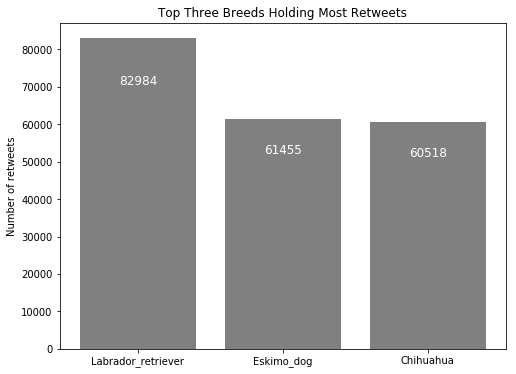

In [594]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
top_breeds = ax.bar(top_rt.breed, top_rt.retweet_count, color = 'grey')
ax.set_title('Top Three Breeds Holding Most Retweets');
ax.set_ylabel('Number of retweets')
def barlabel(top_breeds):
    #stick label to each bar
    for breed in top_breeds:
        height = breed.get_height()
        ax.text(breed.get_x()+ breed.get_width()/2., \
                0.85*height, int(height),\
               ha = 'center', color = 'white', fontsize = 12)
barlabel(top_breeds)
plt.savefig('breed_most_retweets.png')

<br><br>

### What are the top three breeds holding favorites?

In [79]:
#get subset of three highest values of favor_count
asd_favor = asd.nlargest(3, 'favor_count').reset_index(drop = True)

In [80]:
asd_favor['favor_count'] = asd_favor['favor_count'].astype('int64')

In [81]:
top_fv = asd_favor[['breed', 'favor_count']]

In [82]:
top_fv

,breed,favor_count
0,Labrador_retriever,163200
1,Lakeland_terrier,139482
2,Chihuahua,126158


In [83]:
print("Top Three Breeds Holding Most Favorites", '\n')
print(f"First place is: {top_fv.loc[0,'breed']}  - {top_fv.loc[0,'favor_count']} favorites ")
print(f"Second place is: {top_fv.loc[1,'breed']}  - {top_fv.loc[1,'favor_count']} favorites")
print(f"Third place is: {top_fv.loc[2,'breed']}  -  {top_fv.loc[2,'favor_count']} favorites")


Top Three Breeds Holding Most Favorites 

First place is: Labrador_retriever  - 163200 favorites 
Second place is: Lakeland_terrier  - 139482 favorites
Third place is: Chihuahua  -  126158 favorites


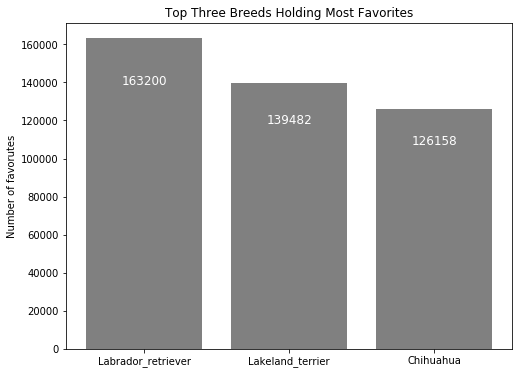

In [592]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
top_breeds = ax.bar(top_fv.breed, top_fv.favor_count, color = 'grey')
ax.set_title('Top Three Breeds Holding Most Favorites');
ax.set_ylabel('Number of favorutes')
def barlabel(top_breeds):
    #stick label to each bar
    for breed in top_breeds:
        height = breed.get_height()
        ax.text(breed.get_x()+ breed.get_width()/2., \
                0.85*height, int(height),\
               ha = 'center', color = 'white', fontsize = 12)
barlabel(top_breeds)
plt.savefig('breed_most_favorites.png')

<br><br>

### Are the breeds mentioned above are the same that holding most audience engagement (the sum of retweets and favorites)

<br><br>

#### What the breeds holding most audience engagement

In [119]:
dsa = asd[(asd['retweet_count'].isnull()== False) & (asd['favor_count'].isnull()== False)].reset_index(drop = True)

In [116]:
asd.info(), print('\n'), dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 12 columns):
timestamp             2299 non-null object
text                  2299 non-null object
rating_numerator      2299 non-null int64
rating_denominator    2299 non-null int64
name                  2299 non-null object
stages                2299 non-null object
jpg_url               1746 non-null object
img_num               1746 non-null float64
breed                 1746 non-null object
retweet_count         2284 non-null float64
favor_count           2284 non-null float64
expanded_url          2052 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 215.6+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2298
Data columns (total 12 columns):
timestamp             2284 non-null object
text                  2284 non-null object
rating_numerator      2284 non-null int64
rating_denominator    2284 non-null int64
name                  2284 non-nu

(None, None, None)

In [121]:
dsa[['retweet_count', 'favor_count']] = dsa[['retweet_count', 'favor_count']].astype('int64')

In [127]:
dsa['engage'] = dsa.retweet_count.add(dsa.favor_count).astype('int64')

In [136]:
top_eng = dsa[['breed','engage']].nlargest(3, 'engage').reset_index(drop = True)

In [139]:
top_eng

,breed,engage
0,Labrador_retriever,246184
1,Lakeland_terrier,186790
2,Chihuahua,186676


In [141]:
print("Top Three Breeds Holding Most Engagment", '\n')
print(f"First place is: {top_eng.loc[0,'breed']}  - {top_eng.loc[0,'engage']} engages ")
print(f"Second place is: {top_eng.loc[1,'breed']}  - {top_eng.loc[1,'engage']} engages")
print(f"Third place is: {top_eng.loc[2,'breed']}  -  {top_eng.loc[2,'engage']} engages")


Top Three Breeds Holding Most Engagment 

First place is: Labrador_retriever  - 246184 engages 
Second place is: Lakeland_terrier  - 186790 engages
Third place is: Chihuahua  -  186676 engages


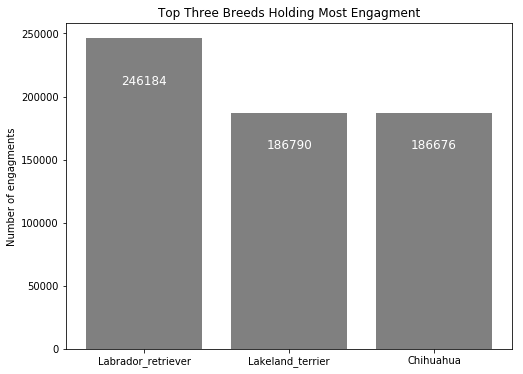

In [593]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
top_breeds = ax.bar(top_eng.breed, top_eng.engage, color = 'grey')
ax.set_title('Top Three Breeds Holding Most Engagment');
ax.set_ylabel('Number of engagments')
def barlabel(top_breeds):
    #stick label to each bar
    for breed in top_breeds:
        height = breed.get_height()
        ax.text(breed.get_x()+ breed.get_width()/2., \
                0.85*height, int(height),\
               ha = 'center', color = 'white', fontsize = 12)
barlabel(top_breeds)
plt.savefig('breed_most_emgage.png')

<br><br>

### Are there same breeds holding most  engagement and the breeds holding most favorites and retweets?

In [148]:
#merge data in one data frame
tops = top_eng.join(top_rt, rsuffix = '_rt').join(top_fv, rsuffix = "_fv")

In [149]:
tops

,breed,engage,breed_rt,retweet_count,breed_fv,favor_count
0,Labrador_retriever,246184,Labrador_retriever,82984,Labrador_retriever,163200
1,Lakeland_terrier,186790,Eskimo_dog,61455,Lakeland_terrier,139482
2,Chihuahua,186676,Chihuahua,60518,Chihuahua,126158


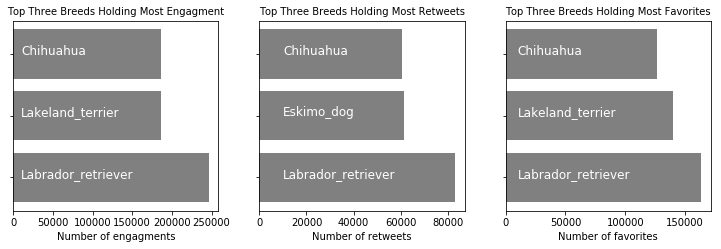

In [595]:
#create a figure with three equal sized columns
fig,(ax0,ax1,ax2) = plt.subplots(ncols = 3)
#set the size of the figure different from a default 
fig.set_size_inches(12.5, 3.5)

ax0.barh(tops.breed, tops.engage, color = 'grey')
ax0.set_title('Top Three Breeds Holding Most Engagment',fontsize = 10);
ax0.set_xlabel('Number of engagments')
ax0.set_yticklabels([])
for i, v in enumerate(tops.breed):
    ax0.text(10000,i, v, color = 'white', fontsize = 12)
    
ax1.barh(tops.breed_rt, tops.retweet_count, color = 'grey')
ax1.set_title('Top Three Breeds Holding Most Retweets',fontsize = 10);
ax1.set_xlabel('Number of retweets')
ax1.set_yticklabels([])
for i, v in enumerate(tops.breed_rt):
    ax1.text(10000,i, v, color = 'white', fontsize = 12)
    
ax2.barh(tops.breed_fv, tops.favor_count, color = 'grey')
ax2.set_title('Top Three Breeds Holding Most Favorites',fontsize = 10);
ax2.set_xlabel('Number of favorites')
ax2.set_yticklabels([])
for i, v in enumerate(tops.breed_fv):
    ax2.text(10000,i, v, color = 'white', fontsize = 12)

    plt.savefig('tops_plt.png')

#### Conclusion

The top breeds are not the same, though the first place is in the same hands. The winner is Labrador Retriever.

It may be a common situation when the same tweet holds the biggest numbers of retweets, favorites and total engagements. However, this is not a rule and we have to check.
The check is done and we found a winner. Let's look at him closer.

In [249]:
#create a variables with variants of the name of winner
winner = tops.nlargest(1,'engage').loc[0,'breed']
winner_low = winner.lower().replace('_'," ")
winner_short = winner.split('_')[0].lower()

In [250]:
winner, winner_low, winner_short

('Labrador_retriever', 'labrador retriever', 'labrador')

In [458]:
#set variable for synonims of winner name
winner_syn =[winner, winner_low, winner_short, "lab", "labs", "labra"]

In [459]:
winner_syn

['Labrador_retriever',
 'labrador retriever',
 'labrador',
 'lab',
 'labs',
 'labra']

<br><br>

### How often is the top breed mentioned in tweets?

In [400]:
# new df
ddf = asd[['tweet_id','text']].copy()

In [401]:
ddf.head(2)

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,This is Tilly. She's just checking pup on you....


In [403]:
#rename first column
ddf = ddf.rename({'tweet_id' : 'id'}, axis = 1);
ddf.head(1)

,id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...


In [407]:
#function to light cleaning text and tokenize it
def process (df):
    
    def tokenize(df): #return column with dicts
        def process_tokens(df): #return column with lists of tokens
            def process_reg(text): #return plain text
                return " ".join([i for i in re.sub(r'[^a-zA-Z\s]', "", str(text)).split()])
            df['tokens'] = [process_reg(text).split() for text in df['text']]
        return process_tokens(df)
    
    tokenize(df)

    def last_short (df):
        def process_dic(df): #return column with dicts
            #convert list of tokens into dictionery with a frequency of term in text as a value
            def process_group(token): 
                return pd.DataFrame(token, columns=["term"]).groupby('term').size().to_dict()
            df['dic'] = [process_group(token) for token in df['tokens']]
        return process_dic(df)
    
    return last_short(df)


In [408]:
process(ddf)

In [409]:
ddf.head(2)

,id,text,tokens,dic
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[This, is, Phineas, Hes, a, mystical, boy, Onl...","{'Hes': 1, 'Only': 1, 'Phineas': 1, 'This': 1,..."
1,892177421306343426,This is Tilly. She's just checking pup on you....,"[This, is, Tilly, Shes, just, checking, pup, o...","{'Hopes': 1, 'If': 1, 'Shes': 1, 'This': 1, 'T..."


Now we want to turn this data frame into a bigger size where we have each term and its frequency in tweet in one row and different columns, both of them associated with the id of tweet term belongs

In [410]:
#return new data frame
def enlarge_df(df):
    #creat empty data frame to append with data from for-loop
    enlarged_df = pd.DataFrame()
    
    for ind in range (df.shape[0]):# for each row in initial data frame
        
        #create new df with column 'id' filled with id of text, index equal to the number of terms in text
        id_df = pd.DataFrame(index = range(len(df.dic[ind])), columns = ['id']).fillna(df.id[ind])
        
        #create df with terms and it's frequency, index equal to the number of terms in text
        terms_df = pd.DataFrame.from_dict(df.dic[ind], orient = 'index',columns = ['frequency']).reset_index().rename({'index':'term'}, axis = 1)
        
        #join two upper data frames
        concat_df = id_df.join([terms_df], sort = False)
        
        #append big data frame with data out of each yext in the row
        enlarged_df = enlarged_df.append(concat_df, ignore_index=True)
    return enlarged_df

In [414]:
ddf = enlarge_df(ddf);

In [415]:
ddf.head()

,id,term,frequency
0,892420643555336193,Hes,1
1,892420643555336193,Only,1
2,892420643555336193,Phineas,1
3,892420643555336193,This,1
4,892420643555336193,a,2


In [420]:
winner_syn

['Labrador_retriever',
 'labrador retriever',
 'labrador',
 'lab',
 'labs',
 'labra']

In [591]:
# how many times top breed mentioned in tweets
count = 0
for i in range(ddf.shape[0]):
    if any(win == ddf.term[i].lower() for win in winner_syn):
        count+=1
    else: 
        continue
count

0

**Unbelievable!**

We have ZERO mentions of Labrador breed in 2298 tweets. <br>
Definitely, this Twitter-channel not about labradors. <br>
Our winner got a win just by funny video, not by breed.

P.S. Just in case you do not trust in the algorithm - add "this" to the 'winner_syn' above

In [579]:
asd.nlargest(1,'retweet_count').loc[992,'expanded_url']

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

<br><br>

### What is the set of words for tweets with the top breed?

Now we have no sense to keep track of our questions, but one case... Let's see what are the tweets representing pictures where prediction algorithm found Labrador_retriver breed.

In [469]:
winner

'Labrador_retriever'

In [511]:
#get a new sub data frame
lab_df = asd[asd.breed == winner]

In [512]:
lab_df.shape

(113, 13)

In [513]:
lab_df = lab_df.reset_index(drop = True)

In [514]:
#get small df
lab_df_small = lab_df[['tweet_id', 'text']].copy()

In [516]:
#tokenize it
process(lab_df_small)

In [518]:
#check
lab_df_small.head(1)

,tweet_id,text,tokens,dic
0,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[This, is, Darla, She, commenced, a, snooze, m...","{'Darla': 1, 'She': 1, 'This': 1, 'a': 1, 'bes..."


In [557]:
#rename column
lab_df_small = lab_df_small.rename({'tweet_id': "id"}, axis = 1);

In [558]:
#enlarge it
lab_df_large = enlarge_df(lab_df_small)

In [561]:
lab_df_large.head(3)

,id,term,frequency
0,891689557279858688,Darla,1
1,891689557279858688,She,1
2,891689557279858688,This,1


In [531]:
#visual assessment without ';'
lab_df_large.term.unique();

In [581]:
#visual assessment without ';'
lab_df_large.term.value_counts();

In [582]:
# convert series to dict and assess it visualy without ';'
lab_df_large.term.value_counts().to_dict();

<br>

**Conclusion**

The data set is too small and not labradory enough to make any decision about specific words for top breed.<br>
We done with analysis of our winner, despite the fact that our Labrador is a good dog.